# Домашнее задание к лекции «Корреляция и корреляционный анализ»

#### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график

- Рассчитать коэффициенты корреляции Пирсона и Спирмена

- Построить модель линейной регрессии

- Рассчитать коэффициент детерминации

- Вывести график остатков


#### 2 Задание.

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы

- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv')

df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
def calculate(columns):
    print('Коэфф. Пирсон')
    print(columns.corr())
    print()
    print('Коэфф. Спирмен')
    print(columns.corr(method='spearman'))
    print()
    print('Коэфф. Кендалл')
    print(columns.corr(method='kendall'))

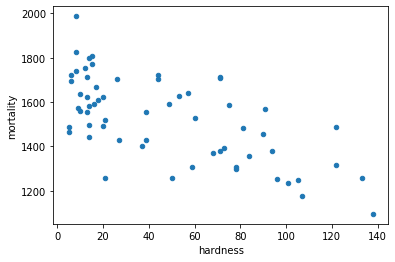

In [4]:
# По графику прослеживается обратная линейная связь: Чем ниже жёсткость воды, тем выше смертность.

df.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
# Все коэффициенты подтверждают обратную корреляцию, выше среднего

calculate(df[['hardness', 'mortality']])

Коэфф. Пирсон
           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000

Коэфф. Спирмен
           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000

Коэфф. Кендалл
           hardness  mortality
hardness   1.000000  -0.453753
mortality -0.453753   1.000000


###### Сделаем тоже самое отдельно для северных и южных городов

In [6]:
# Убедимся, что там нет других значений

df[['location', 'town' ]].groupby('location').count()

,town
location,
North,35
South,26


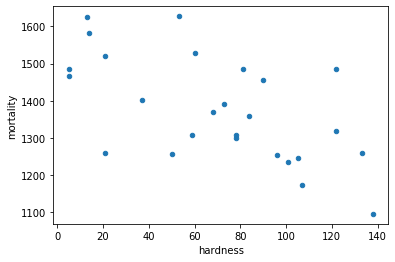

In [8]:
# Для южных городов видно обратную корреляцию, хотя график более размазан

df[df.location == 'South'].plot(kind='scatter', x='hardness', y='mortality')

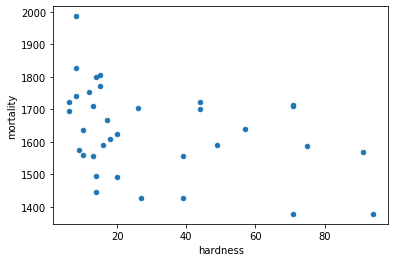

In [10]:
# Для северных городов я не вижу линейной зависимости (да и нелинейной тоже)

df[df.location == 'North'].plot(kind='scatter', x='hardness', y='mortality')

In [11]:
# Считаем для южных городов, корреляция сохраняется (она чуть меньше, чем для всего дата-сета)

calculate(df[df.location == 'South'][['hardness', 'mortality']])

Коэфф. Пирсон
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

Коэфф. Спирмен
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000

Коэфф. Кендалл
           hardness  mortality
hardness   1.000000  -0.440315
mortality -0.440315   1.000000


In [12]:
# Считаем для северных городов, корреляция сильно упала

calculate(df[df.location == 'North'][['hardness', 'mortality']])

Коэфф. Пирсон
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

Коэфф. Спирмен
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000

Коэфф. Кендалл
           hardness  mortality
hardness   1.000000  -0.283058
mortality -0.283058   1.000000


#### Дальше у меня есть 2 варианта, как поделить выборку:
- рандомно
- в пропорциях по location

Я считаю более верным второй вариант, но попробую оба.

По параметру test_size, датасет очень маленький, я пробовала разные параметры, здесь нет большой разницы между 20-40%,
на 10% тестовая выборка 6 точек, модель просто подгонит коэффициенты. Оставляю 30% для тестовых данных.

In [13]:
# 1 вариант - рандомно

X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('coef_', model.coef_, 'intercept_', model.intercept_)
print(y_pred)

model.score(X_test, y_test)

coef_ [-3.13167087] intercept_ 1668.9722977277095
[1340.14685615 1637.65558901 1625.12890552 1531.17877935 1424.7019697
 1606.33888028 1252.46007173 1434.09698232 1603.20720941 1650.18227249
 1484.20371627 1415.30695708 1546.83713371 1625.12890552 1446.62366581
 1546.83713371 1637.65558901 1621.99723465 1352.67353964]


0.5046490611017092

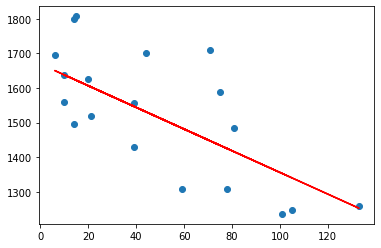

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

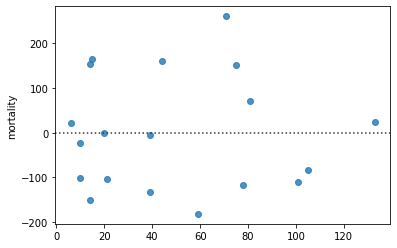

In [15]:
#График остатков

sns.residplot(X_test, y_test, data=df) 

#### Такая же модель отдельно для регионов

Здесь модели получаются хуже наивных. Если я правильно интерпретирую эти коэффициенты, здесь не подходит модель линейной регрессии, так как нет линейной зависимости и/или слишком много выбросов. При изменении random_state, коэффициенты скачут рандомным образом.

In [16]:
# Южные

df_s = df[df.location == 'South']

X = df_s[['hardness']]
y = df_s['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('coef_', model.coef_, 'intercept_', model.intercept_)
print(y_pred)

model.score(X_test, y_test)

coef_ [-3.51342921] intercept_ 1640.2204603423374
[1211.58209643 1622.65331428 1271.31039304 1211.58209643 1510.22357948
 1566.43844688 1432.92813681 1622.65331428]


-2.551922301235205

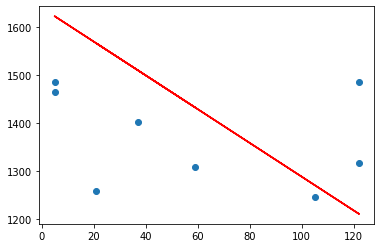

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

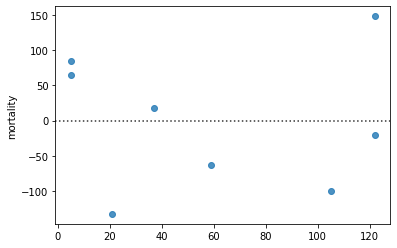

In [18]:
#График остатков

sns.residplot(X_test, y_test, data=df) 

In [19]:
# Северные

df_n = df[df.location == 'North']

X = df_n[['hardness']]
y = df_n['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('coef_', model.coef_, 'intercept_', model.intercept_)
print(y_pred)

model.score(X_test, y_test)

coef_ [-1.97686226] intercept_ 1688.150229031281
[1672.33533095 1670.35846869 1660.47415739 1676.28905547 1656.52043287
 1547.79300857 1601.16828959 1672.33533095 1611.05260089 1658.49729513
 1611.05260089]


0.018885304285745863

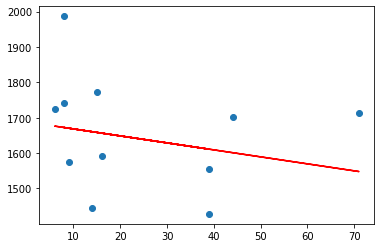

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

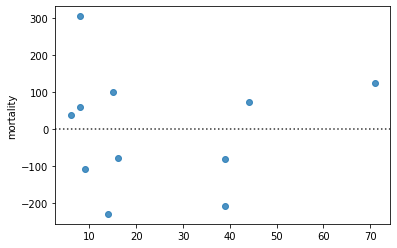

In [21]:
#График остатков

sns.residplot(X_test, y_test, data=df) 

#### 2 вариант(только для полного набора данных) - в пропорциях по location

При таком распределении коэффициент сильно упал, так как корреляция для северных городов очень низкая, а это 60% учебных данных.

In [22]:
X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=df['location'] , random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('coef_', model.coef_, 'intercept_', model.intercept_)
print(y_pred)

model.score(X_test, y_test)

coef_ [-3.27721062] intercept_ 1683.7696882197451
[1595.28500148 1352.77141561 1428.14725987 1385.54352181 1460.91936607
 1451.08773421 1247.90067577 1644.44316078 1437.97889173 1487.13705102
 1618.22547582 1562.51289528 1523.18636784]


0.30846880398260035

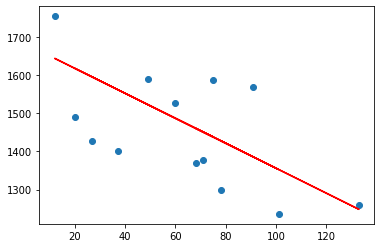

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

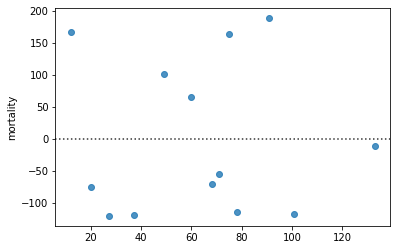

In [24]:
#График остатков

sns.residplot(X_test, y_test, data=df) 

#### Вывод:

Мне кажется, это тот самый случай, когда есть математическая корреляция, но нет фактической.
По визуализации и по коэффициентам корреляции кажется, что есть обратная связь, но модель линейной регрессии даёт большой разброс коэффициента детерминации. Если рассматривать отдельно южные и северные города, связи нет, по крайней мере линейной.

Либо это просто совпадение, либо есть ещё какие-то факторы, связанные со свойствами воды, которые влияют на смертность именно в южных регионах (Например, какие-нибудь бактерии, которые любят мягкую воду и не выживают на морозе). В любом случае, в этом датасете недостаточно данных, чтобы делать какие-то выводы.